In [1]:
import numpy as np
import pandas as pd

# Importing Dataset

In [2]:
df = pd.read_csv("churn.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Dataset Shape

In [3]:
df.shape

(10000, 14)

# Dropping Feautures

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Nan Values

In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Creating X and Y Features

In [6]:
x = df.drop(["Exited"], axis=True)
y = df["Exited"]
print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [7]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Data Visualization

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'age')

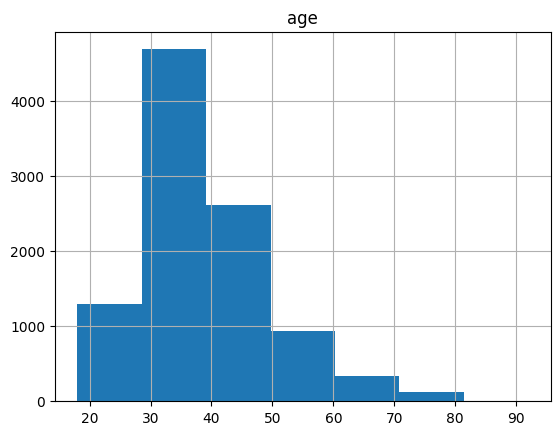

In [10]:
hist_plot = df["Age"].hist(bins=7)
hist_plot.set_title("age")


Text(0.5, 1.0, 'CreditScore')

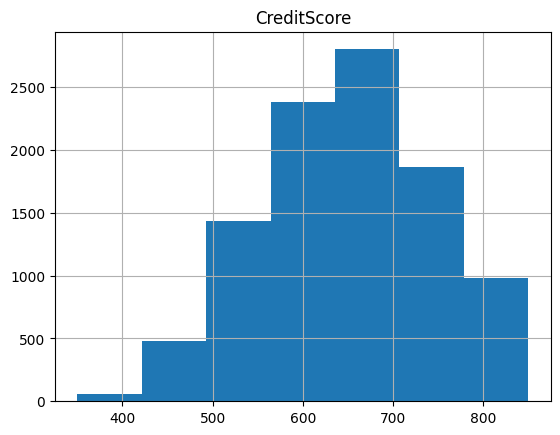

In [11]:
hist_plot = df["CreditScore"].hist(bins=7)
hist_plot.set_title("CreditScore")


# What are the respective mean values of these two features (use the pandas.DataFrame.mean() function)?

In [12]:
df.groupby('Age')['CreditScore'].mean()

Age
18    686.681818
19    665.629630
20    665.050000
21    647.283019
22    636.547619
         ...    
83    678.000000
84    472.500000
85    787.000000
88    513.000000
92    729.000000
Name: CreditScore, Length: 70, dtype: float64

In [13]:
print('Mean Value of dataset for Age is :',df["Age"].mean(axis = 0))

Mean Value of dataset for Age is : 38.9218


In [14]:
print('Mean Value of dataset for CreditScore is :',df["CreditScore"].mean(axis = 0))

Mean Value of dataset for CreditScore is : 650.5288


# What is the respective standard deviation of these two features (use the pandas.DataFrame.std() function)? 

In [15]:
df.groupby('Age')['CreditScore'].std()

Age
18     82.379139
19     92.624199
20     82.325791
21     75.687967
22    101.605593
         ...    
83           NaN
84     91.216775
85           NaN
88           NaN
92     33.941125
Name: CreditScore, Length: 70, dtype: float64

In [16]:
print('Standard Deviation Value of dataset for CreditScore is :',df["CreditScore"].std(axis = 0))

Standard Deviation Value of dataset for CreditScore is : 96.65329873613035


In [17]:
print('Standard Deviation Value of dataset for Age is :',df["Age"].std(axis = 0))

Standard Deviation Value of dataset for Age is : 10.487806451704609


<AxesSubplot: title={'center': 'Male Customer (Exit Rate)'}, ylabel='Exited'>

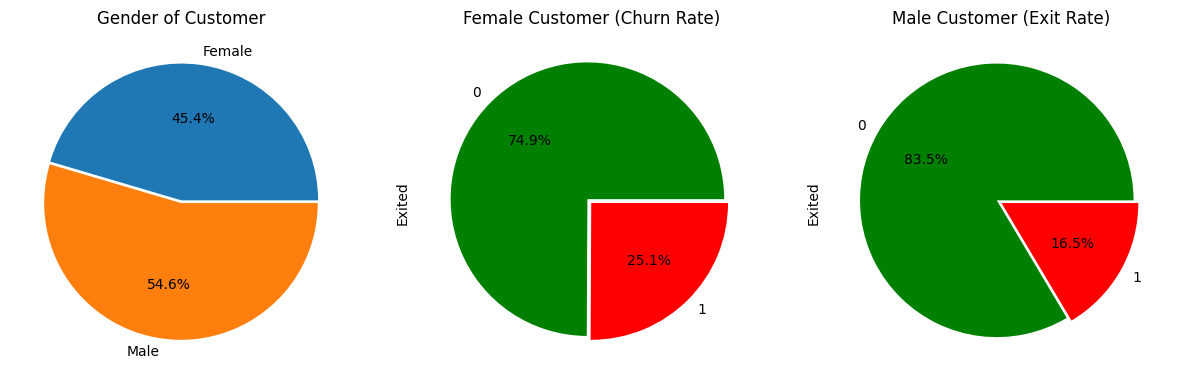

In [18]:
sex=df.groupby(by='Gender')

plt.figure(figsize=(15,5))
plt.subplot(131)
sex.size().plot(kind='pie',autopct='%.1f%%',ylabel='',title='Gender of Customer',explode=[0.02,0])
plt.subplot(132)
sex.get_group('Female')['Exited'].value_counts().plot(kind='pie',colors=['g','r'],explode=[0.04,0],autopct='%.1f%%',title='Female Customer (Churn Rate)')
plt.subplot(133)
sex.get_group('Male')['Exited'].value_counts().plot(kind='pie',colors=['g','r'],explode=[0.04,0],autopct='%.1f%%',title='Male Customer (Exit Rate)')

C:\Users\BENSON\AppData\Local\Temp\ipykernel_18936\3010725831.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


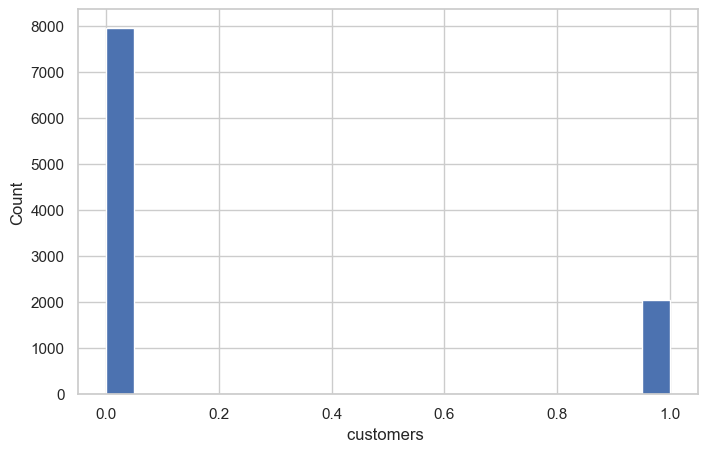

In [19]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    y, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='customers ', ylabel='Count');

#  Dummies for float values

In [20]:
x = pd.get_dummies(x, columns=["Geography","Gender"])

In [21]:
x.shape

(10000, 13)

# Data Splitting 80:20

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=20, random_state=0)

# Data Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

In [24]:
X_train = scaled.fit_transform(X_train)

In [25]:
X_test = scaled.transform(X_test)

# Modelling

# Logistic Regression classifier 

In [26]:
from sklearn.linear_model import LogisticRegression
model_1_lr = LogisticRegression()

In [27]:
model_1_lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred_lr = model_1_lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

0.8

# Support Vector Machine Classifier

In [30]:
from sklearn.svm import SVC

In [31]:
model_2_svm = SVC(kernel='linear', random_state=0)

In [32]:
model_2_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [33]:
y_pred_svm = model_2_svm.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.7

In [37]:
pip install -U imbalanced-learn


  Using cached imbalanced_learn-0.10.0-py3-none-any.whl (225 kB)


In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [39]:
model_3_smote_lr = LogisticRegression()

In [40]:
model_3_smote_lr.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [41]:
y_pred_smote_lr = model_3_smote_lr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_smote_lr)

0.8

# Modeling SVM on a balanced dataset

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [44]:
model_4_smote_svm = SVC(kernel='linear', random_state=0)

In [45]:
model_4_smote_svm.fit(X_train_smote,y_train_smote)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred_smote_svm = model_4_smote_svm.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_smote_svm)

0.8

#  Modeling Grid Search Parameter Selection for SVM

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'C': [1, 10, 100, 1000, 10000], 
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['rbf']} 

In [66]:
grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 1)

In [ ]:
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test, grid_predictions))

# Evaluation

# Logistic Regression Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred_lr)

In [ ]:
confusion_matrix(y_test, y_pred_lr).ravel()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_lr).ravel()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr, average='macro'))
print('Recall:   ', recall_score(y_test, y_pred_lr, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred_lr, average='macro'))

# Support Vector Machine Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred_svm)

In [ ]:
confusion_matrix(y_test, y_pred_svm).ravel()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_svm).ravel()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm, average='macro'))
print('Recall:   ', recall_score(y_test, y_pred_svm, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred_svm, average='macro'))

# Modeling Logistic Regression Classifier on a balanced dataset Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_smote_lr)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred_smote_lr)

In [ ]:
confusion_matrix(y_test, y_pred_smote_lr).ravel()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_smote_lr).ravel()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred_smote_lr))
print('Precision:', precision_score(y_test, y_pred_smote_lr, average='macro'))
print('Recall:   ', recall_score(y_test, y_pred_smote_lr, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred_smote_lr, average='macro'))

# Modeling SVM on a balanced dataset Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_smote_svm)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred_smote_svm)

In [ ]:
confusion_matrix(y_test, y_pred_smote_svm).ravel()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_smote_svm).ravel()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred_smote_svm))
print('Precision:', precision_score(y_test, y_pred_smote_svm, average='macro'))
print('Recall:   ', recall_score(y_test, y_pred_smote_svm, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred_smote_svm, average='macro'))